#### Resources:
- Paul Centore - A Zonohedral Approach to Optimal Colours
(https://legacy.sites.fas.harvard.edu/~cs278/papers/zone.pdf)
- Jessica Lee - Theory of Human Tetrachromatic Color Experience and Printing (https://imjal.github.io/theory-of-tetrachromacy/static/pdfs/Lee_TheoryofTet_v1.pdf)

#### Instructions:
Make sure to install Jessica's repository as a Python package using the line below. It requires Python 3.11.

In [ ]:
!pip install -q git+https://github.com/VarunNSrivastava/ChromaLab

In [1]:
from chromalab.observer import Observer
from chromalab.spectra import Spectra, Illuminant
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from tqdm import tqdm
%matplotlib widget

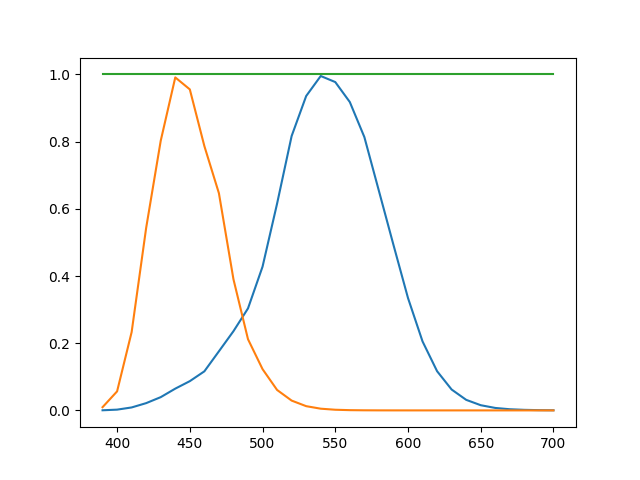

In [15]:
# Cone responses of a typical trichromat.
fig, ax = plt.subplots()
wavelengths = np.arange(390, 701, 10)
n = len(wavelengths)
standard_dichromat = Observer.dichromat(wavelengths)
# illuminant = Illuminant.get("ISO 7589 Photographic Daylight").interpolate_values(wavelengths)
illuminant = np.vstack([wavelengths, np.ones(n)]).T
plt.plot(wavelengths, standard_dichromat.sensors[1].data)
plt.plot(wavelengths, standard_dichromat.sensors[0].data)
plt.plot(wavelengths, illuminant[:,1])

plt.show()

In [ ]:
ms_responses = np.vstack((standard_dichromat.sensors[0].data, 
                           standard_dichromat.sensors[1].data))
points = np.copy(ms_responses).T # generating vectors

# generate a list of optimal color vertices from the locus 
vertices = np.zeros((n * 2, 2))
vertex_colors = np.zeros((n * 2, 3))

for i in range(1,n + 1):
    # fills up vertices from 1 to n
    vertices[i] = vertices[i - 1] + points[i - 1]
    
    # fill in the reflectance
    reflectance_data = np.zeros(n)
    for j in range(i):
        # from black to white point
        reflectance_data[j] = 1 # give 1 to all generating vectors associating with the particular position
    # reflectance = Spectra(wavelengths=wavelengths, data=reflectance_data)
    # vertex_colors[i] = reflectance.to_rgb(illuminant)
    s = ms_responses[:,0]

for i in range(1, n):
    # fills up vertices from n+1 to 2n
    vertices[i + n] = vertices[i + n - 1] - points[i - 1]
    reflectance_data = np.zeros(n)
    for j in reversed(range(i, n)):
        
        # from black to white point
        reflectance_data[j] = 1 # give 1 to all generating vectors associating with the particular position
    reflectance = Spectra(wavelengths=wavelengths, data=reflectance_data)
    vertex_colors[i + n] = reflectance.to_rgb(illuminant)
    
print(vertex_colors)

In [20]:
# Each point has an indicator reflectance function where R = 1 at a single wavelength and 0 elsewhere.
# These points can be thought of as vectors which form a (linearly dependent) basis.
# The Minkowski sum of these vectors span the object color solid.
# Each point in the solid can be represented as some (non-unique) linear combination of these vectors.
# This represents equations (9), (10), (11), (12), (13).
ms_responses = np.vstack((standard_dichromat.sensors[0].data, 
                           standard_dichromat.sensors[1].data))
print(len(ms_responses))
points = np.copy(ms_responses).T # generating vectors

# generate a list of optimal color vertices from the locus 
vertices = np.zeros((n * 2, 2))
vertex_colors = np.zeros((n * 2, 3))

for i in range(1,n + 1):
    # fills up vertices from 1 to n
    vertices[i] = vertices[i - 1] + points[i - 1]
    
    # fill in the reflectance
    reflectance_data = np.zeros(n)
    for j in range(i):
        # from black to white point
        reflectance_data[j] = 1 # give 1 to all generating vectors associating with the particular position
    reflectance = Spectra(wavelengths=wavelengths, data=reflectance_data)
    vertex_colors[i] = reflectance.to_rgb(illuminant)

for i in range(1, n):
    # fills up vertices from n+1 to 2n
    vertices[i + n] = vertices[i + n - 1] - points[i - 1]
    reflectance_data = np.zeros(n)
    for j in reversed(range(i, n)):
        
        # from black to white point
        reflectance_data[j] = 1 # give 1 to all generating vectors associating with the particular position
    reflectance = Spectra(wavelengths=wavelengths, data=reflectance_data)
    vertex_colors[i + n] = reflectance.to_rgb(illuminant)
    
print(vertex_colors)
# assign colors to each vertex


# # This represents the diagram in (8)
# faces = np.zeros((n * (n - 1), 4, 2))
# face_colors = np.zeros((n * (n - 1), 3))
# for i in tqdm(range(1, n)):
#     for j in range(n):
#         faces[((i - 1) * n) + j, 0] = vertices[i, j]
#         faces[((i - 1) * n) + j, 1] = vertices[i - 1, (j + 1) % n]
#         faces[((i - 1) * n) + j, 2] = vertices[i, (j + 1) % n]
#         faces[((i - 1) * n) + j, 3] = vertices[i + 1, j]
        
#         # Calculate the reflectance on each face by using the reflectance of one of its vertices.
#         # Since each vertex can be thought of as a linear combination of the basis vectors, 
#         # the vertex's reflectance is the sum of reflectances of those vectors that made up the vertex.
#         # optimal colors only occur ont he boundary of the solid itself
#         reflectance_data = np.zeros(n) #fix this so reflectance is only 1 on the boundary and 0 elsewhere
#         for k in range(i):
#                 reflectance_data[(j + k) % n] = 1
#         reflectance = Spectra(wavelengths=wavelengths, data=reflectance_data)
#         face_colors[(i - 1) * n + j] = reflectance.to_rgb(illumninant)    # Bottleneck. Takes about 3ms. 


2
[[ 0.          0.          0.        ]
 [ 0.0029352   0.          0.02098587]
 [ 0.0123023   0.          0.07763319]
 [ 0.04504136  0.          0.17511118]
 [ 0.10565819  0.          0.31982081]
 [ 0.17017993  0.          0.48392667]
 [ 0.22533163  0.          0.64529426]
 [ 0.25820715  0.          0.78351106]
 [ 0.26076591  0.          0.89156852]
 [ 0.22315851  0.          0.96522974]
 [ 0.10370276  0.          1.        ]
 [ 0.          0.          1.        ]
 [ 0.          0.256765    1.        ]
 [ 0.          0.41647454  1.        ]
 [ 0.          0.55307787  1.        ]
 [ 0.          0.67230006  1.        ]
 [ 0.          0.77178128  1.        ]
 [ 0.          0.85356102  1.        ]
 [ 0.          0.91732949  1.        ]
 [ 0.          0.96410971  1.        ]
 [ 0.          0.99554781  1.        ]
 [ 0.08628272  1.          1.        ]
 [ 0.5039608   1.          1.        ]
 [ 0.68785899  1.          1.        ]
 [ 0.80787912  1.          1.        ]
 [ 0.88506112  1.      

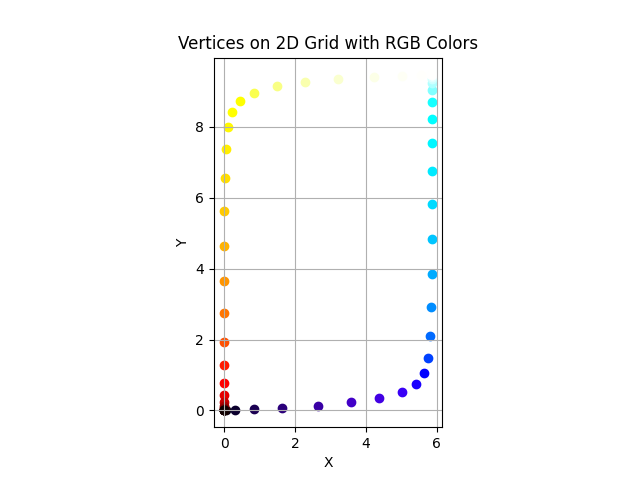

In [21]:
# Plot each vertex with its RGB color on a 2D grid
fig, ax = plt.subplots()
for i, vertex in enumerate(vertices):
    ax.scatter(vertex[0], vertex[1], color=vertex_colors[i])
    # Display RGB values near the vertex

# Customize the plot
ax.set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Vertices on 2D Grid with RGB Colors")
plt.grid(True)
plt.show()

In [19]:
# Uses ideas from Jessica's paper, on chapter 3.2 The Max Basis.
# We use the cutpoints that Jessica shows to be optimal for the trichromatic case.
cutpoint_1 = 487
cutpoint_2 = 573
index_1 = None
index_2 = None
for i, wavelength in enumerate(wavelengths):
    if index_1 is None and wavelength > cutpoint_1:
        index_1 = i
    if index_2 is None and wavelength >= cutpoint_2:
        index_2 = i
        break

# We calculate the vectors p1, p2 and p3 as shown in the paper.
# We "project the partition into the cone response basis" by summing up all the lms_responses within each partition.
# Note that our earlier calculations for lms_responses includes the illuminant already.
p1 = np.sum(ms_responses[:, :index_1], axis=1).reshape((2, 1))
p2 = np.sum(ms_responses[:, index_1:index_2], axis=1).reshape((2, 1))

# We then create a transformation matrix that maps p1 to (1, 0, 0), p2 to (0, 1, 0) and p3 to (1, 0, 0).
# p1, p2 and p3 correspond to the ideal R, G, B points on our object color solid, 
# and we are mapping them onto the R, G, B points on the RGB cube.
# We are essentially "stretching" our object color solid so that it approximates the RGB cube.
transformation_matrix = np.linalg.inv(np.hstack((p1, p2)))
faces_transformed = np.matmul(vertices, transformation_matrix.T)

ValueError: 'c' argument has 32 elements, which is inconsistent with 'x' and 'y' with size 64.

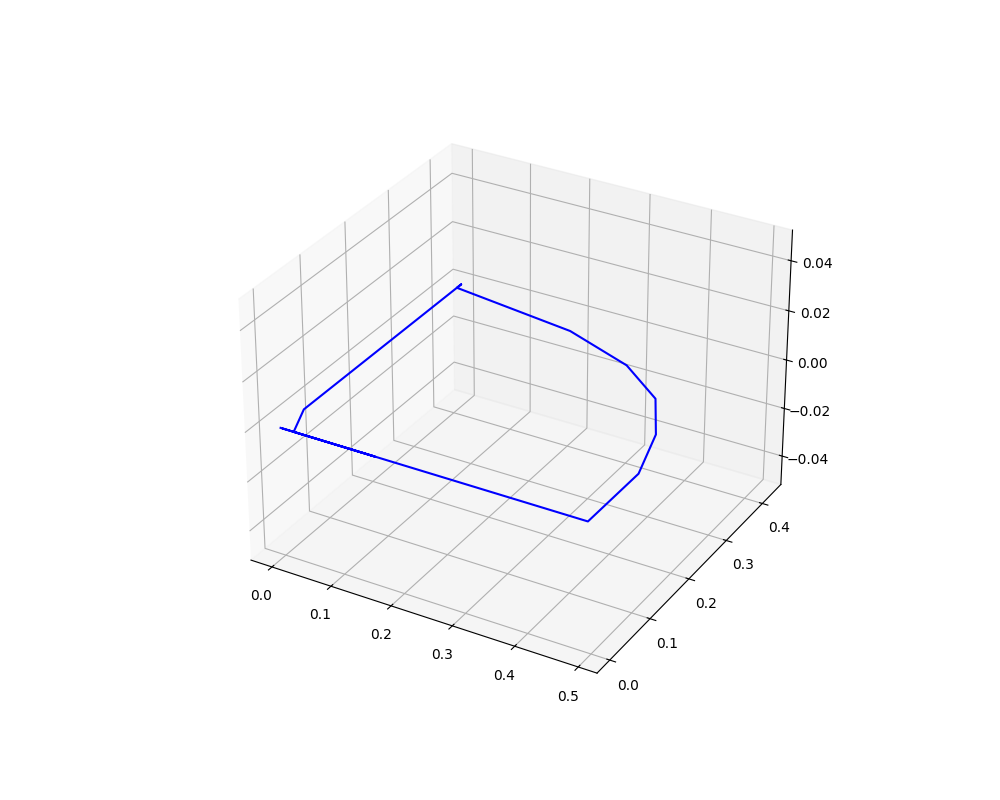

In [24]:
# Get cone response functions

# Create the color locus
locus = vertex_colors # numsamples, 3
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the color locus
ax.plot(locus[:, 0], locus[:, 1], np.zeros(locus.shape[0]), 'b-')

# Add scatter points colored by wavelength
scatter = ax.scatter(locus[:, 0], locus[:, 1], np.zeros(locus.shape[0]), c=wavelengths, cmap='Spectral')

# Set labels and title
ax.set_xlabel('L Response')
ax.set_ylabel('M Response')
ax.set_zlabel('S Response')
ax.set_title('Color Locus in LMS Space')

# Add a color bar
plt.colorbar(scatter, label='Wavelength (nm)')

# Show the plot
plt.show()

NameError: name 'face_colors' is not defined

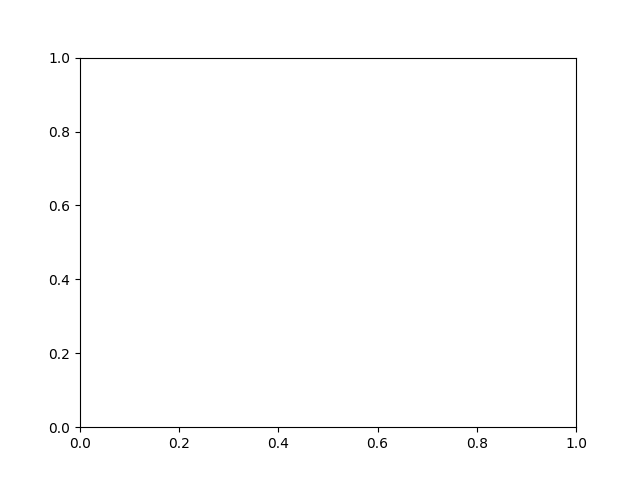

In [21]:
fig, ax = plt.subplots()
# Create a PolyCollection from the faces and face_colors
collection = PolyCollection(vertices, facecolors=vertex_colors)

# Add the collection to the plot
ax.add_collection(collection)

# Set the limits based on the data
ax.autoscale()
ax.set_aspect('equal')

ax.set_xlabel('S')
ax.set_ylabel('M')
ax.set_title('Object Color Solid in MS Max Basis')
plt.show()